In the below script I would like to present some basic ideas and foundations behind a dimensionality reduction. In general working with high-dimensional data is usually a necessity. However, threre is many cases once we want to recude dimensionality of a data. Firstly, it helps to visualize a data, and secondly, it makes further algorithms faster, since there is less data to handle with. We can start with the basic example which shows the idea of that task. 

In [78]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
from sklearn.datasets.samples_generator import make_swiss_roll

### 1. Foundations beheind dimensionality reduction.

The below is well know data set make_moons from sklearn library. It contains 2-dimensional data and 1-dimensional labels, all can be plotted as presented. On the 2-dimensional plane we can easily check two groups of points that create each half moon, even if they are noised. That's true because the noise is 2-dimensional and shapes of each cluster can be still observed, and secondly we still use the fact that data is labeled and there occur two colors:

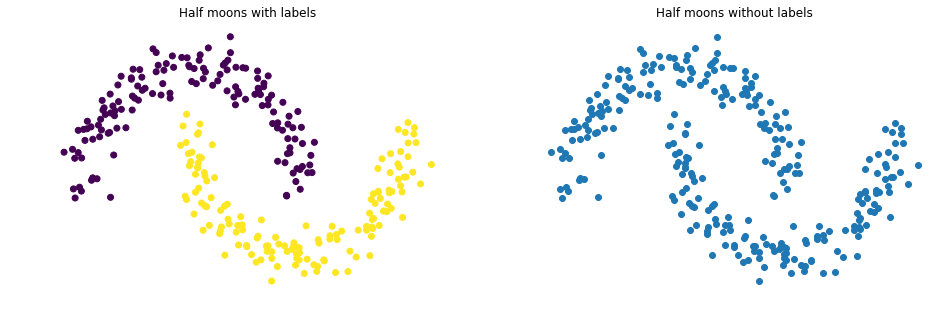

In [84]:
data, labels = sklearn.datasets.make_moons(n_samples=290, shuffle=True, noise=0.1, random_state=None)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.scatter(data[:, 0], data[:, 1], c=labels)
ax1.set_title("Half moons with labels")
ax1.axis('off')
ax2.scatter(data[:, 0], data[:, 1], c=None)
ax2.set_title("Half moons without labels")
ax2.axis('off')
plt.show()

Let us assume that we have the 3-dimensional make_moons data set instead of 2-dimensional one. It can be simply generated and also vizualize as shown:

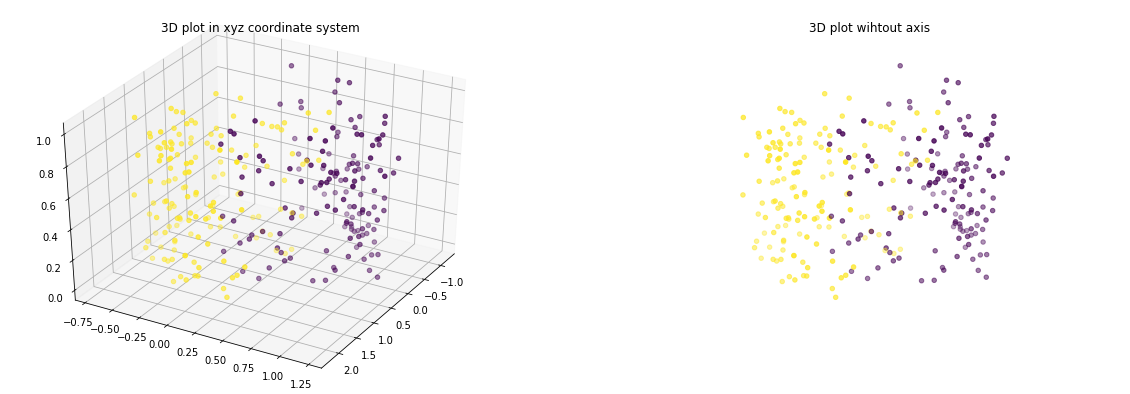

In [85]:
z_axis = np.random.rand(len(data), 1)
data = np.concatenate((data, z_axis), axis=1)
fig= plt.figure(figsize = (20, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)
ax1.set_title("3D plot in xyz coordinate system")
ax1.view_init(35, 30)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(35, 30)
ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)
ax2.set_title("3D plot wihtout axis")
ax2.axis('off')
plt.show()

It is a bit less trivial to decide if these points can be separated (classified) or not. Clearly, there are still two categories (two colors) on the plot, but wihout labels no pattern could be obtain to distinguish any two gropus on the above. On both sides we can see one-color points, but in the middle they seem to be mixed up. So that the task of dimensionality reduction start here. First method to start with is a projection. We want to find a hyperplane, such that the lost of information is as least as possible, on the other hand points are as separated as possible. We can try to look on the data with the appropriate angle to see how it works.

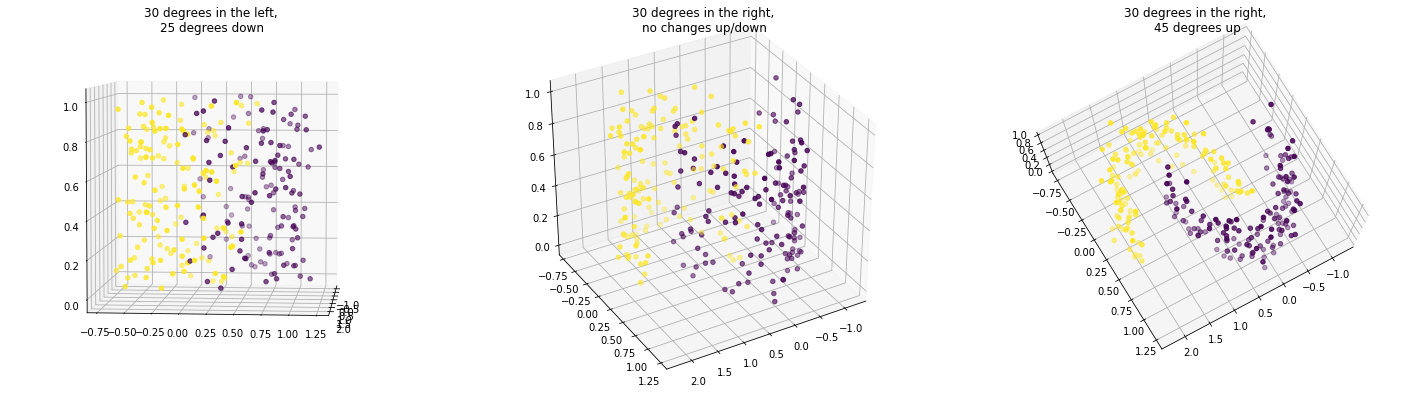

In [86]:
fig= plt.figure(figsize = (25, 7))
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:,2], c=labels)
ax1.set_title("30 degrees in the left, \n25 degrees down")
ax1.view_init(5, 5)
ax2 = fig.add_subplot(132, projection='3d')
ax2.view_init(35, 60)
ax2.scatter(data[:, 0], data[:, 1], data[:,2], c=labels)
ax2.set_title("30 degrees in the right, \nno changes up/down")
ax3 = fig.add_subplot(133, projection='3d')
ax3.view_init(80, 60)
ax3.scatter(data[:, 0], data[:, 1], data[:,2], c=labels)
ax3.set_title("30 degrees in the right, \n45 degrees up")
plt.show()

On the third plot we can see the classification again, since we are going to look on it from the top. It simply means that projection on a hyperplane $ \{ (x, y, 0) \in \mathbb{R}\times\mathbb{R}\times\{0\} \} $ should return the case to the original one; by looking from the top we have two dimensional plot as previously:

In [87]:
x_mesh = np.linspace(-.75, 1.25, 60)
y_mesh = np.linspace(-1, 2, 60)
[y, x] = np.meshgrid(x_mesh, y_mesh)

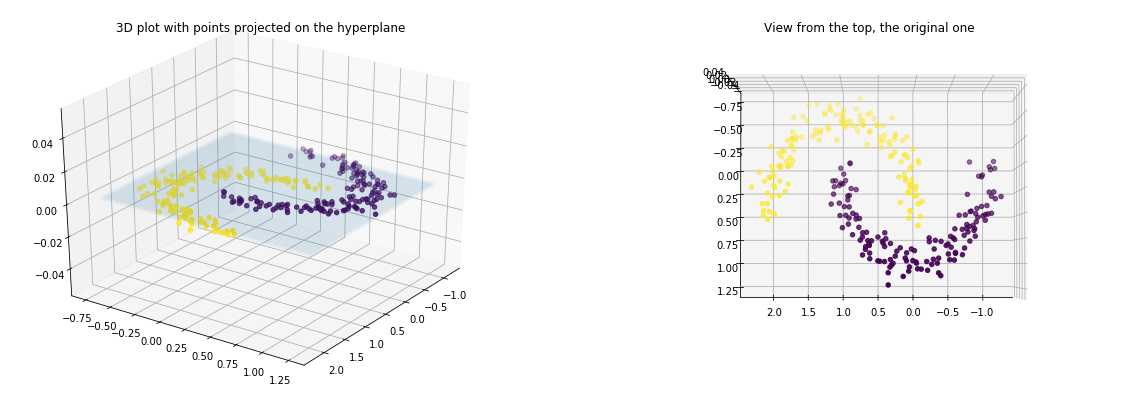

In [88]:
fig= plt.figure(figsize = (20, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], c=labels)
ax1.scatter(x, y, alpha=0.03)
ax1.set_title("3D plot with points projected on the hyperplane")
ax1.view_init(30, 35)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(88, 90)
ax2.scatter(data[:, 0], data[:, 1], c=labels)
ax2.set_title("View from the top, the original one")
plt.show()

Unfortunately, the projection trick is not always such effective. Let us check the below swiss_roll dataset. The boundary between each class is not linear, moreover looking from any direction makes at least two clasees cover to each other - on the second plot we can see that violet and yellow points are completely covered and mixed up. On the rest of plot the classification is even worse. So that it's hardly possible to project this 3-dimensional set efficiently using 2-dimensional hyperplane. 

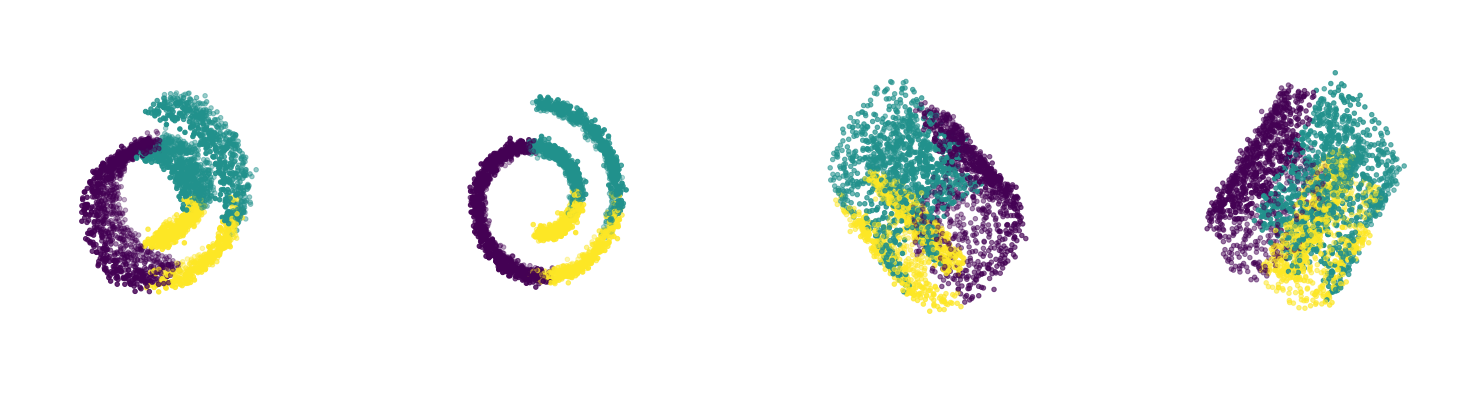

In [89]:
swiss, _ = make_swiss_roll(3000, 0.5)
ac = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(swiss)
label = ac.labels_
fig= plt.figure(figsize = (26, 7))
ax1 = fig.add_subplot(141, projection='3d')
ax1.scatter(swiss[:, 0], swiss[:, 1], swiss[:,2], c=label)
ax1.view_init(8, -78)
ax1.axis('off')
ax2 = fig.add_subplot(142, projection='3d')
ax2.view_init(0, -90)
ax2.scatter(swiss[:, 0], swiss[:, 1], swiss[:,2], c=label)
ax2.axis('off')
ax3 = fig.add_subplot(143, projection='3d')
ax3.view_init(35, 60)
ax3.scatter(swiss[:, 0], swiss[:, 1], swiss[:,2], c=label)
ax3.axis('off')
ax4 = fig.add_subplot(144, projection='3d')
ax4.view_init(60, -60)
ax4.scatter(swiss[:, 0], swiss[:, 1], swiss[:,2], c=label)
ax4.axis('off')
plt.show()

Below there are predictions made using decision tree classifier trained on some (chosen) projections on 2-dimensional plane, we can easily see that predition is strongly inacurate:

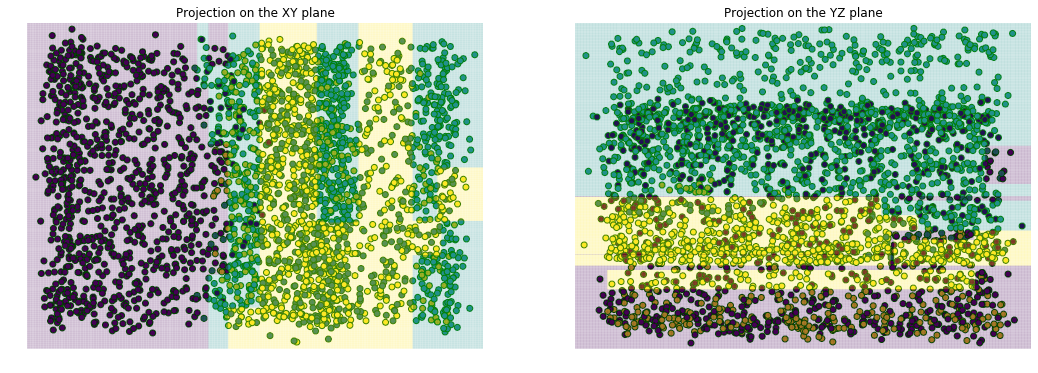

In [91]:
from sklearn.tree import DecisionTreeClassifier

axs = [ax1, ax2]
f, axs = plt.subplots(1, 2, figsize=(18, 6))
i = 0
j = 2
for ax in axs:
    tree_clf = DecisionTreeClassifier( max_depth = 6 , min_samples_leaf = 5)
    tree_clf.fit(swiss[:, i: j], label)
    pred = tree_clf.predict(swiss[:, i: j])

    if i==0:
        OX_min, OX_max = swiss[:,0].min() - .5, swiss[:,0].max() + .5
        OY_min, OY_max = swiss[:,1].min() - .5, swiss[:,1].max() + .5
        xx, yy = np.meshgrid(np.arange(OX_min, OX_max, 0.01), np.arange(OY_min, OY_max, 0.01))

        y_pred_tree = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
        y_pred_tree = y_pred_tree.reshape(xx.shape)
        ax.set_title("Projection on the XY plane")
        ax.scatter(swiss[:,0], swiss[:,1], c=label, edgecolor = 'g')
        ax.pcolormesh(xx, yy, y_pred_tree, alpha = 0.007)
        ax.axis('off')
    else:
        OX_min, OX_max = swiss[:,1].min() - .5, swiss[:,1].max() + .5
        OY_min, OY_max = swiss[:,2].min() - .5, swiss[:,2].max() + .5
        xx, yy = np.meshgrid(np.arange(OX_min, OX_max, 0.01), np.arange(OY_min, OY_max, 0.01))

        y_pred_tree = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
        y_pred_tree = y_pred_tree.reshape(xx.shape)
        ax.set_title("Projection on the YZ plane")
        ax.scatter(swiss[:,1], swiss[:,2], c=label, edgecolor = 'g')
        ax.pcolormesh(xx, yy, y_pred_tree, alpha = 0.007)
        ax.axis('off')
    i+=1
    j+=1
plt.show()

### 2. Principal Component Analysis - reduction by projection.

So that, we can guess that the choice of mostly appropriate hyperplane is the crucial challenge here. The most common tool used to this task is called Principal Component Analysis (PCA). Roughly speaking it does what described below - it looks for a hyperplane (of given dimension) that 
can be used to simplify the data with least possible loss of informations (greatest possible variance), this choice (of hyperplane) minimizes the mean squared distance between the original set and its projection on the hyperplane. 

The vector of i-th axis of the found projection is called i-th principal component. The tool used to find all components is the singular value decomposition (SVD), well known from linear algebra:
$$ X = U\cdot\Sigma\cdot V$$
where the matrix $V$ contains all principal components for a set $X$. It can be simply applied using svd() from numpy library. On the below sample we can compute SVD decomposition, first two connected components, and project the data on hyperplane spanned by them:

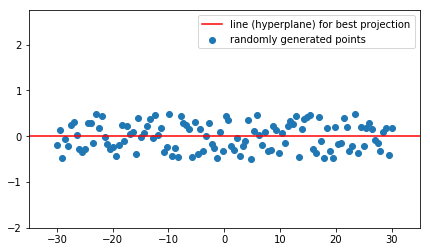

In [93]:
a = np.linspace(-30, 30, 120)
b = np.random.rand(120) - 0.5
X = np.asarray([a, b])

X_centered = X - X.mean(axis=0) ## PCA assumes that the dataset is centered with the respect to the origin of coordinate system
U, Sigma, Vt = np.linalg.svd(X_centered)

component1 = Vt.T[:, 0] ## first principal component
component2 = Vt.T[:, 1] ## second principal component

V2 = Vt.T[:, :2] ## first two components
X2D = X_centered.dot(V2) ## projection X_centered on V2

plt.figure(figsize=(7, 4))
plt.xlim((-35, 35))
plt.ylim((-2, 2.75))
plt.scatter(a, b, label='randomly generated points')
plt.plot(X2D[:, 0], X2D[:, 1], c='r', label='line (hyperplane) for best projection')
plt.legend()
plt.show()

In practice we usually use models implemented in a library to process PCA (and another tasks). Let us check how it works on the swiss_roll data set. The PCA model from sklearn.decomposition returns also pca.explained_variance_ratio_, that explains the loss of the variance accured on each principal component.

Principal components:

 [[ 0.43156899 -0.00250812  0.90207645]
 [-0.87244685  0.25304387  0.41809724]] 

Variance ratio: [39.94 31.16] - it means that almost 40% variance of the data set has been kept using the first principal component, and the 31% for the second one.


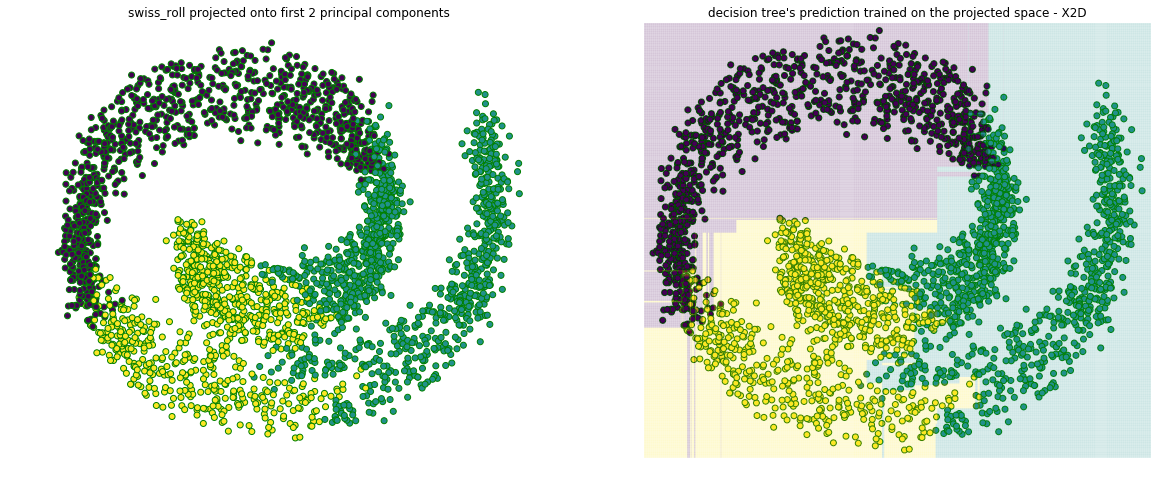

In [94]:
from sklearn.decomposition import PCA

X, y = swiss, label

#X_centered = X - X.mean(axis=0) ## PCA assumes that the dataset is centered with the respect to the origin of coordinate system
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

print("Principal components:\n\n",pca.components_,"\n")
print("Variance ratio:", np.round(pca.explained_variance_ratio_ * 100, 2),"- it means that almost 40% variance of the data set has been kept using the first principal component, and the 31% for the second one.")

f, axs = plt.subplots(1, 2, figsize = (20, 8))
for idx, ax in enumerate(axs):
    if idx==0:
        ax.set_title("swiss_roll projected onto first 2 principal components")
        ax.scatter(X2D[:,0], X2D[:,1], c=y, edgecolor='g')
        ax.axis('off')
    else:
        OX_min, OX_max = X2D[:,0].min() - .5, X2D[:,0].max() + .5
        OY_min, OY_max = X2D[:,1].min() - .5, X2D[:,1].max() + .5
        xx, yy = np.meshgrid(np.arange(OX_min, OX_max, 0.01), np.arange(OY_min, OY_max, 0.01))
        tree_clf = DecisionTreeClassifier()
        tree_clf.fit(X2D[:,:2],y)
        pred = tree_clf.predict(X2D[:,:2])

        y_pred_tree = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
        y_pred_tree = y_pred_tree.reshape(xx.shape)
                
        ax.set_title("decision tree's prediction trained on the projected space - X2D")
        ax.scatter(X2D[:,0], X2D[:,1], c=y, edgecolor = 'g')
        ax.pcolormesh(xx, yy, y_pred_tree, alpha = 0.007)
        ax.axis('off')
plt.show()

As we can see all three labels can be easily find (and separate), moreover mixing of points is maximally reduced. Before going to another types of PCA we can also arange a simple autoencoder to that task. Autoencoders differ from the standard neural networks, they obtain the same size of output sample as for the input one. By creating a simple model with three layers: input, hidden and output, the first and third one has dimensionality euqal to three, while the middle hidden layer posses dimensionality of two. It basically means, that the model gets 3-dimensional data, then needs to transform it into 2-dimensional structure and finally reconstruct this structure back in 3 dimensions. Model tries to reconstruct the data as accurate as it can, so in this case it just tries to find 2-dimensional plane to project the data, with the least possible loss of information. For PCA analysis we do not use any activation function (as usual for neural networks), in other words all neuros are linear (lienarly projected and reconstructed). The cost function is mean squared error (MSE) and the optimizer is chosen to be Adam:

In [95]:
import tensorflow as tf

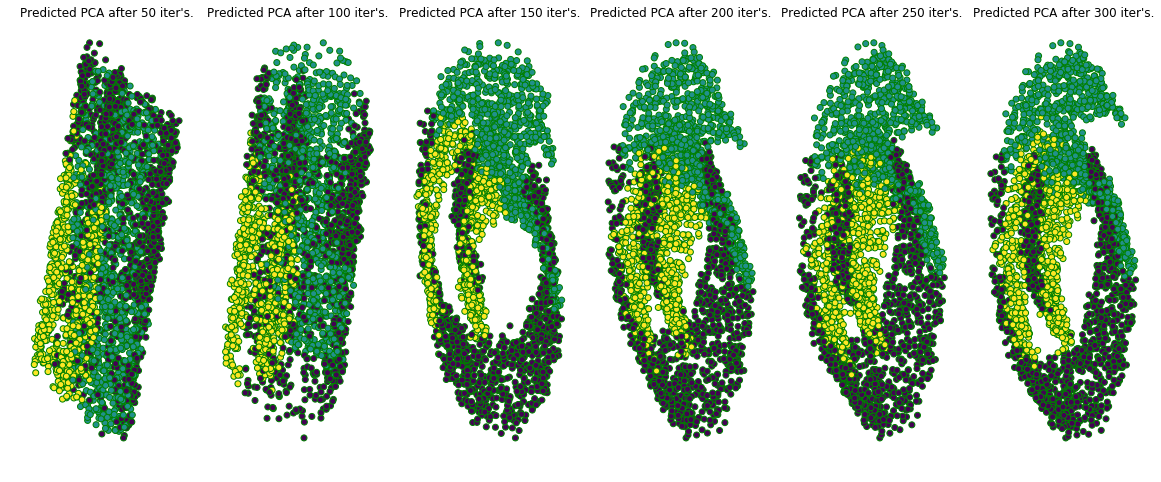

In [762]:
tf.keras.backend.clear_session()

dim_input = 3 ### d-diomensional inputs
dim_coder = 2 ### 2-dimensional coding 
dim_output = dim_input

learning_rate = 0.001

X = tf.keras.Input(shape=[dim_input], dtype=tf.float32)
hidden = tf.keras.layers.Dense(units=dim_coder, activation=None)(X)
output = tf.keras.layers.Dense(units=dim_output)(hidden)

encoder = tf.keras.Model(X, hidden, name='Encoder')

autoencoder = tf.keras.Model(X, output, name='Autoencoder')

encoded_input = tf.keras.Input(shape=(2))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

ax_s = [ax1, ax2]
f, ax_s = plt.subplots(1, 6, figsize=(20, 8))

for idx, a in enumerate(ax_s):
    history = autoencoder.fit(x=swiss, y=swiss, epochs=50, shuffle=True, verbose=0)
    pred = encoder.predict(swiss)
    title = "Predicted PCA after " + str((idx*50)+50) + " iter's."
    a.set_title(title)
    a.scatter(pred[:,0], pred[:,1], c=y, edgecolor = 'g')
    a.axis('off')
plt.show()

As usual for nerual networks the decomposition depends from the weights initialization, number of iterations etc., after 300 iterations points are projected and separated somehow, however we can easily see that the above plots differs from the previous ones (when using standard models). Below there are presented another types of PCA algorithm:
- Incremental PCA - useful for larger data: the problem with SVD is that all data has to be inserted and processed to find best projections. This type of PCA splits the data into smaller batches and fits the data partially,
- Randomized PCA - it's stochastic algorithm that finds approximations of first $d$-components. It's much faster than standard PCA, if $d$ number is significantly smaller than $n$ (what is generally true for high-dimensional data),
- Kernel PCA - the kernel trick uses in Support Vector Machine algorithm (which helps to obtain non-linear classification/regression results), can be used also for PCA - we can get non-linear projections that preserve accumulations in original data

In [96]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA

In [97]:
class dimensionality_reduction:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def train_val_split(self, X, y, val_size):
        if val_size > 1 or val_size <= 0:
            raise SyntaxError("Validation size should be a float between 0 and 1")
        perm = list(np.random.permutation(X.shape[0]))
        split_index = int(X.shape[0] * val_size)
        train_idxs = perm[split_index:]
        test_idxs = perm[:split_index]
        self.X_train = X[train_idxs]
        self.y_train = y[train_idxs]
        self.X_val = X[test_idxs]  
        self.y_val = y[test_idxs]  
        
    def _pca(self, n_components=None, var_loss=0):
        pca = PCA(n_components = n_components)
        self.X2D_pca = pca.fit_transform(self.X)
        self.pca_ratio = pca.explained_variance_ratio_
        self.cumsum = np.cumsum(self.pca_ratio)
        self.dims = np.argmax(self.cumsum > var_loss) + 1
        
    def incremental_pca(self, n_components, n_batches):
        ipca = IncrementalPCA(n_components=n_components)
        for x_batch in np.array_split(self.X, n_batches):
            ipca.partial_fit(x_batch)
        self.X2D_ipca = ipca.transform(self.X)
        
    def randomized_pca(self, n_components=None, var_loss=0):   
        rpca = PCA(n_components = n_components, svd_solver='randomized')
        self.X2D_rpca = rpca.fit_transform(self.X)
        self.rpca_ratio = rpca.explained_variance_ratio_
        self.rcumsum = np.cumsum(self.rpca_ratio)
        self.rdims = np.argmax(self.rcumsum > var_loss) + 1
        
    def kernel_pca(self, n_components=None, kernel=None, gamma=0.05):
        self.kpca = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma, fit_inverse_transform=True)
        self.X2D_kpca = self.kpca.fit_transform(self.X)        

In [19]:
swiss_roll = dimensionality_reduction(swiss, label)

There is another nice functionality in implemented PCA model, it can return the minimum number of dimension, needed to lost less then given percent of the variance. In other words, below we can see that 3 dimensions are needed to keep 95% percent of the variance.

In [20]:
swiss_roll._pca(None, 0.95)
swiss_roll.dims

3

In [73]:
swiss_roll.incremental_pca(2, 150)
swiss_roll.randomized_pca(2)

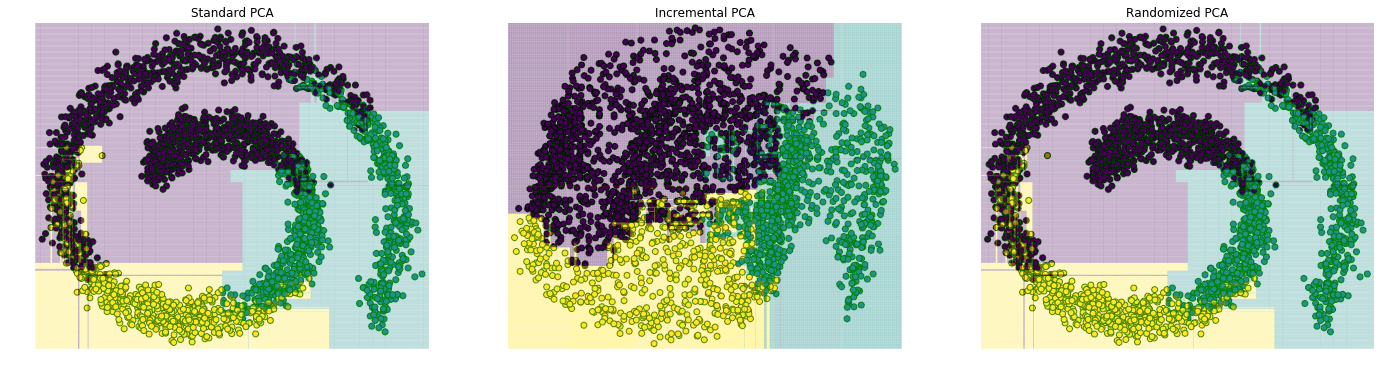

In [38]:
ax_s = [ax1, ax2, ax3]
proj_list = [swiss_roll.X2D_pca, swiss_roll.X2D_ipca, swiss_roll.X2D_rpca]
titles = [str("Standard PCA"), str("Incremental PCA"), str("Randomized PCA")]

f, ax_s = plt.subplots(1, 3, figsize=(24, 6))

for idx, ax in enumerate(ax_s):
    OX_min, OX_max = proj_list[idx][:,0].min() - .5, proj_list[idx][:,0].max() + .5
    OY_min, OY_max = proj_list[idx][:,1].min() - .5, proj_list[idx][:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(OX_min, OX_max, 0.01), np.arange(OY_min, OY_max, 0.01))
    tree_clf = DecisionTreeClassifier()
    tree_clf.fit(proj_list[idx][:,:2],y)
    pred = tree_clf.predict(proj_list[idx][:,:2])

    y_pred_tree = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred_tree = y_pred_tree.reshape(xx.shape)
                
    ax.set_title(titles[idx])
    ax.scatter(proj_list[idx][:,0], proj_list[idx][:,1], c=y, edgecolor = 'g')
    ax.pcolormesh(xx, yy, y_pred_tree, alpha = 0.007)
    ax.axis('off')
plt.show()

Below there are also plots of different kernals in the Kernal PCA algorithm (with gamma hyperparameter equal to 0.001, 0.05 and 0.01 particularly). In general to find the best value of gamma and the best choice of the kernel, one can use GridSearchCV tool, implemented in sklearn.modelselection. It will compare accuracy of each combination of given lists with hyperparameters - since PCA is the unsupervised method, it has to be connected with any supervised model, the logistic regression, for example. 

Moreover, by setting the parameter fit_inverse_transform=True, we can compute the preimage of the trasformed (reduced) data and compute the loss (MSE) between the original data and its preimage. Mathematically, let $$\varphi \ : \ \mathcal{M}\ni X\longmapsto \ \varphi(X) \in \mathcal{N}\subset\mathcal{M}$$ be the function that reduces the original data set $X$ in $\mathcal{M}$ in to its projection $\varphi(X)$ in $\mathcal{N}$, $\mathcal{M, N}$ can be any manifolds (spaces), in our case $\mathcal{M}=\mathbb{R}^3, \ \mathcal{N}=\mathbb{R}^2$. Then we can compute the loss of the reconstruction (taking preimage on the image) as shown below: $$\text{MSE}(X, \ \varphi^{-1}(\varphi(X))).$$



Gamma = 0.001


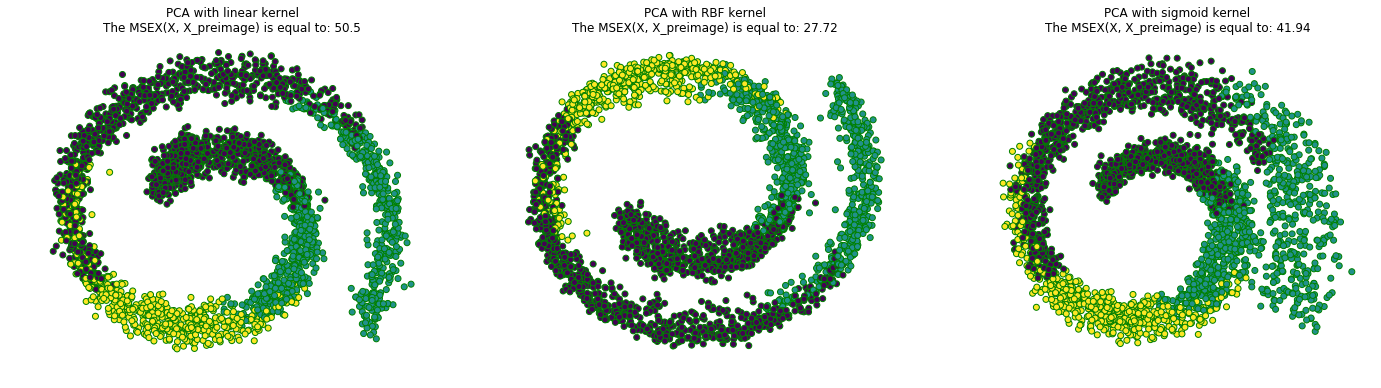

Gamma = 0.05


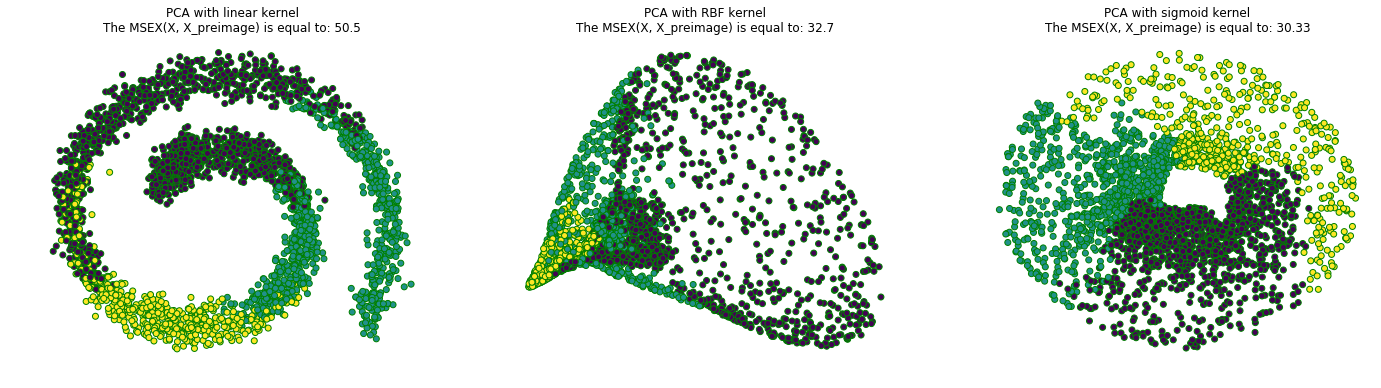

Gamma = 0.01


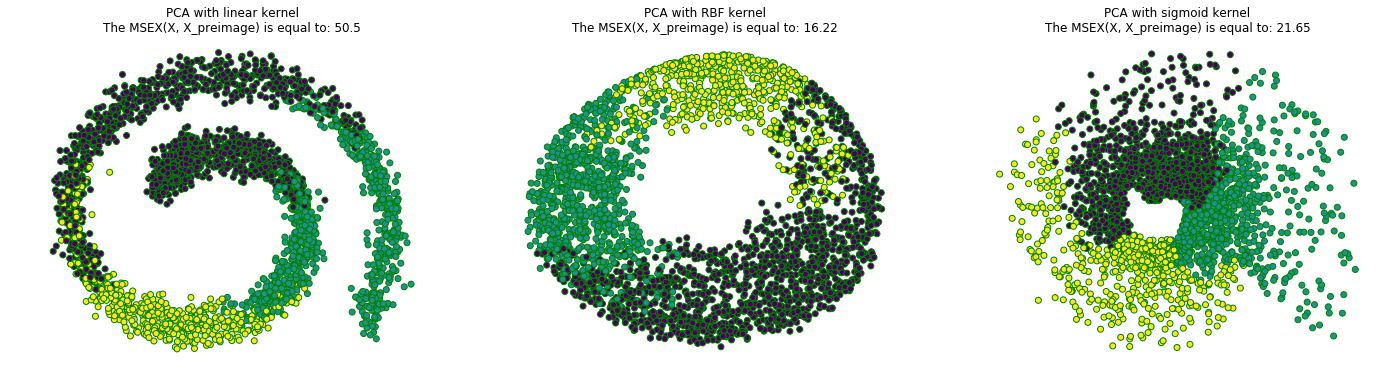

In [84]:
ax_s = [ax1, ax2, ax3]
kernels = ['linear', 'rbf', 'sigmoid']
titles = [str("PCA with linear kernel"), str("PCA with RBF kernel"), str("PCA with sigmoid kernel")]


print("Gamma = 0.001")
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    swiss_roll.kernel_pca(2, kernels[idx], gamma=0.001)
    X_preimage = swiss_roll.kpca.inverse_transform(swiss_roll.X2D_kpca)
    mse = mean_squared_error(swiss_roll.X, X_preimage)
    title = titles[idx] + str("\nThe MSEX(X, X_preimage) is equal to: ") + str(np.round(mse, 2))          
    ax.set_title(title)
    ax.scatter(swiss_roll.X2D_kpca[:,0], swiss_roll.X2D_kpca[:,1], c=y, edgecolor = 'g')
    ax.axis('off')
plt.show()
print("Gamma = 0.05")
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    swiss_roll.kernel_pca(2, kernels[idx], gamma=0.05)
    X_preimage = swiss_roll.kpca.inverse_transform(swiss_roll.X2D_kpca)
    mse = mean_squared_error(swiss_roll.X, X_preimage)
    title = titles[idx] + str("\nThe MSEX(X, X_preimage) is equal to: ") + str(np.round(mse, 2))
    ax.set_title(title)
    ax.scatter(swiss_roll.X2D_kpca[:,0], swiss_roll.X2D_kpca[:,1], c=y, edgecolor = 'g')
    ax.axis('off')
plt.show()
print("Gamma = 0.01")
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    swiss_roll.kernel_pca(2, kernels[idx], gamma=0.01)
    X_preimage = swiss_roll.kpca.inverse_transform(swiss_roll.X2D_kpca)
    mse = mean_squared_error(swiss_roll.X, X_preimage)
    title = titles[idx] + str("\nThe MSEX(X, X_preimage) is equal to: ") + str(np.round(mse, 2))
    ax.set_title(title)
    ax.scatter(swiss_roll.X2D_kpca[:,0], swiss_roll.X2D_kpca[:,1], c=y, edgecolor = 'g')
    ax.axis('off')
plt.show()

### 3. Manifold learning techniques.

Already presented family of PCA models is based on the projection. As mentioned before, it's usually effective but in some cases projections can be not enough - we can use the manifold approach then. In general, the main difference is that the projection works globally, the whole set is projected on the found hyperplane. Sometimes it's more efficient to look on the set locally as the manifold approach does. Topologically speaking, it basically means that we look on each point, together with its neighbourhood as some k-dimensional manifold. That manifold is embedded into the n-dimensional (vector) space. Then we look on the next point, again, together with its neighbourhood. Step by step, all points are analyzed and the 'shape' of whole set can be visualized.


In our case, the model would treat swiss_roll dataset locally as a 2-dimensional plane (2-manifold) embedded (rolled) in the 3-dimensional space. As we could see in previous examples, each time some points are mixed up with the wrong class and, what is important, using projection we not always are able to split the dataset simply into its categories, where points from each category lie close to each other on the plot. Using non-linear kernels the situation looks better, all points from each class are together. Below techniques can easier handle twisted and rolled datasetes - such models use the hypothesis called 'the manifold assumption', which simply states that most of real, high-dimensional datasets can be treat (without significant lost of information) as manifold with much less dimension that the original space. In other word, it would mean that very often for high-dimensional data, only some dimensions are crucial and enough to work with. There is another (usually empirical) state associated with the manifold assumption: given task (regression or classification) often is more simply and efficient, if it's done in the subspace (manifold) of the original space. It is not always true, though. Everything depends on the concrete dataset, anyway it's good to know such embeddings of manifolds exist.

Below there there are presented algorithms from the manifold learning area - very powerful tool in non-linear dimensionality reduction.

In [98]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [99]:
class manifold_models:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def train_val_split(self, X, y, val_size):
        if val_size > 1 or val_size <= 0:
            raise SyntaxError("Validation size should be a float between 0 and 1")
        perm = list(np.random.permutation(X.shape[0]))
        split_index = int(X.shape[0] * val_size)
        train_idxs = perm[split_index:]
        test_idxs = perm[:split_index]
        self.X_train = X[train_idxs]
        self.y_train = y[train_idxs]
        self.X_val = X[test_idxs]  
        self.y_val = y[test_idxs]  

    def _lle(self, n_components, n_neighbors, method='standard'):      
        self.lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors, method=method)
        self.X2D_lle = self.lle.fit_transform(swiss_roll.X)
        
    def _isomap(self, n_components, n_neighbors):
        self.iso = Isomap(n_components=n_components, n_neighbors=n_neighbors)
        self.X2D_iso = self.iso.fit_transform(self.X)
        
    def _tsne(self, perplexity=30, early_exaggeration=12):
        self.tsne = TSNE(perplexity=perplexity, early_exaggeration=early_exaggeration)
        self.tsne_params = self.tsne.get_params
        self.X2D_tsne = self.tsne.fit_transform(self.X)

**Isomap** stands for Isometric Feature Mapping. Isometry in mathematics is a transformation between metric spaces that preserve a distance (norm). Usually it's assumed to be isomorphic (bijective). 

The Isomap model starts from creating the network of neighborhoods. It uses sklearn.neighbors.BallTree for efficient neighbor search, the number of neighbors consider to each point should be set properly - too large number will connect all points as neighbors of each other. Then the shortest distance between each pair of points is approximated. The model uses geodesics instead of Euclidean distance, since in case of dataset with many holes, taking usual Euclidean metric would return inaccurate results. As mentioned before, in manifold learning we use local point of view, so we do not want to escape outside the manifold, on the below plot we can see how it works. Euclidean distance between two red points is relatively small, but it's a global proeprty - it depends on the current shape of the dataset. However, if the distance would have been counted through the manifold (blue points), then it is same as long as the local shape of points is preserved. As we can see below the Euclidean distance between red points differs - two points that were relatively close on the left plot, are away from each other on the right one. On the other hand, we could say that on both pictures 'there is +/- same number of points between the red ones'. The the shortest path given in such way is called the geodesic. Using geodesics is completely natural once talking about the Earth. Each time we cound the distance between two cities, we count the distance along the shpere, not through the interior of the planet. 

Once the distance between each pair of points is known, the eigenvalue decomposition of the distance matrix is made to find the embedding of the dataset in the low-dimensional space.

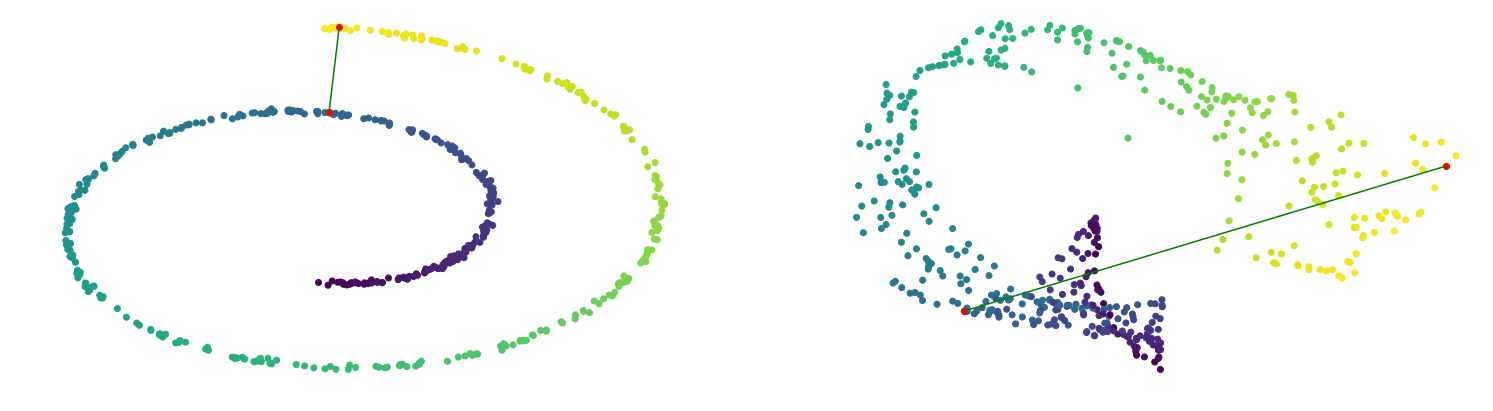

In [10]:
spiral, _ = make_swiss_roll(500, 0.09)

fig= plt.figure(figsize = (26, 7))
ax1 = fig.add_subplot(121)
ax1.scatter(spiral[:, 0], spiral[:, 2], c=_)
ax1.scatter(spiral[np.argmax(spiral[:, 2]), 0], spiral[np.argmax(spiral[:, 2]), 2], c='r')
np.argmax(spiral[:, 2])
x_max = spiral[np.argmax(spiral[:, 2]), 0]
x_min = x_max - 0.4
pts = []
idxs = []
for i in range(len(spiral)):
    if x_min < spiral[i, 0] < x_max:
        if 5 < spiral[i, 2] < 10:
            pts.append(spiral[i, 2])
            idxs.append(i)
py = np.max(pts)
px = idxs[np.argmax(pts)]
ax1.scatter(spiral[px, 0], py, c='r')
ax1.plot([spiral[px, 0], spiral[np.argmax(spiral[:, 2]), 0]], [py, spiral[np.argmax(spiral[:, 2]), 2]], c='g')
ax1.axis('off')

example = manifold_models(spiral, _)
example._isomap(2, 9)
ax2 = fig.add_subplot(122)
ax2.scatter(example.X2D_iso[:,0], example.X2D_iso[:,1], c=_)
ax2.scatter(example.X2D_iso[px, 0], example.X2D_iso[px, 1], c='r')
ax2.scatter(example.X2D_iso[np.argmax(spiral[:, 2]), 0], example.X2D_iso[np.argmax(spiral[:, 2]), 1], c='r')
ax2.plot([example.X2D_iso[px, 0], example.X2D_iso[np.argmax(spiral[:, 2]), 0]], [example.X2D_iso[px, 1], example.X2D_iso[np.argmax(spiral[:, 2]), 1]], c='g')
ax2.axis('off')
plt.show()

In [47]:
man_mods = manifold_models(swiss_roll.X, swiss_roll.y)
man_mods._isomap(2, 15)

Below we can observe how the number of neighbors, considered for each point, changes the embedding:

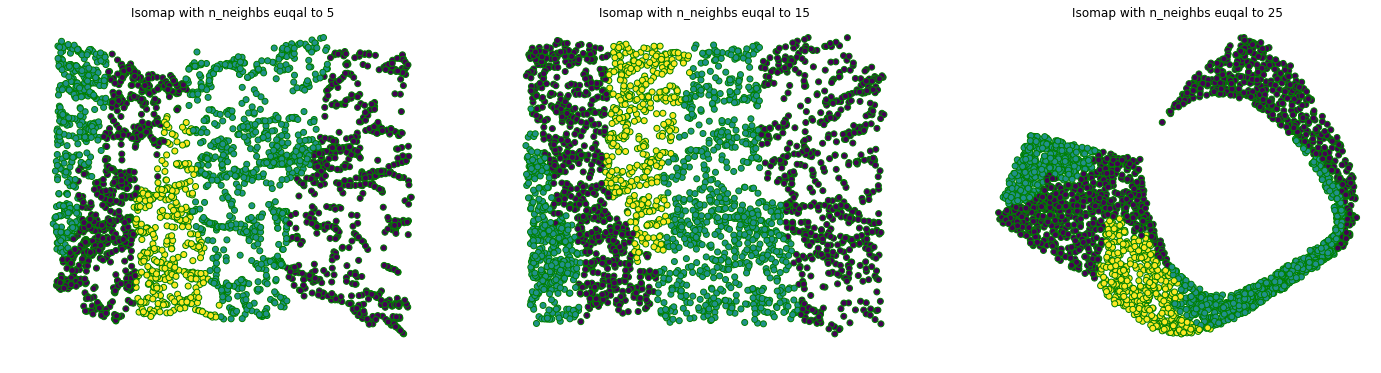

In [42]:
n_neighbs = [5, 15, 25] 
ax_s = [ax1, ax2, ax3]
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    man_mods._isomap(2, n_neighbs[idx])
    title = str("Isomap with n_neighbs euqal to ") + str(n_neighbs[idx])          
    ax.set_title(title)
    ax.scatter(man_mods.X2D_iso[:,0], man_mods.X2D_iso[:,1], c=man_mods.y, edgecolor = 'g')
    ax.axis('off')
plt.show()

The next method used in manifold learning is called a **Locally Linear Embedding (LLE)**. In general, manifold learning techniques use some characteristics (like the distance in the previous case), that can be preserve to find a mapping from the high-dimensional space into the low-dimensional one. Topology preserving is about neighbors, literally - one of the most common thing one can say about the topology, is that it defines open sets, balls, in the space. In other words, it defines the shape of the neighborhood, like the metric defines the way to measure a distance. One can say that if two points are close to each other topologically (one point is contained in the neighborhood of the second one, let say), then after using the mapping that preserves topology, those points should be mapped closely again. The matrix of neighborhoods can be find using for example K-nearest neighbors, $\varepsilon$-neighborhood etc. Then the reconstruction is obtained by taking linear coefficients of weights - each points is represented as a linear, weighted sum of its neighbors. Hence the proces is clearly local. Finally the low-dimensional representation of each point is created using its neighbors and the its matrix with weights. Below there are presented some examples, again, we can observe how embeddings differ when the number of consider neighbors changes: 
- if it's small and only few points are taken as neighbors, it's not enough to preserve the structure of the dataset - points are categorized more or less, but clusters look like lines, not enough number of points were considered to 'get the plane shape'. Moreover the outliers exist here, those points were too far to group them together with the rest,
- for n_neighbs = 15, we can see a 2-dimensional plane somehow, but the curvature of the set is still observed - points are unrolled but not completely,
- for n_neighbs large enough the straight plane is obtained.

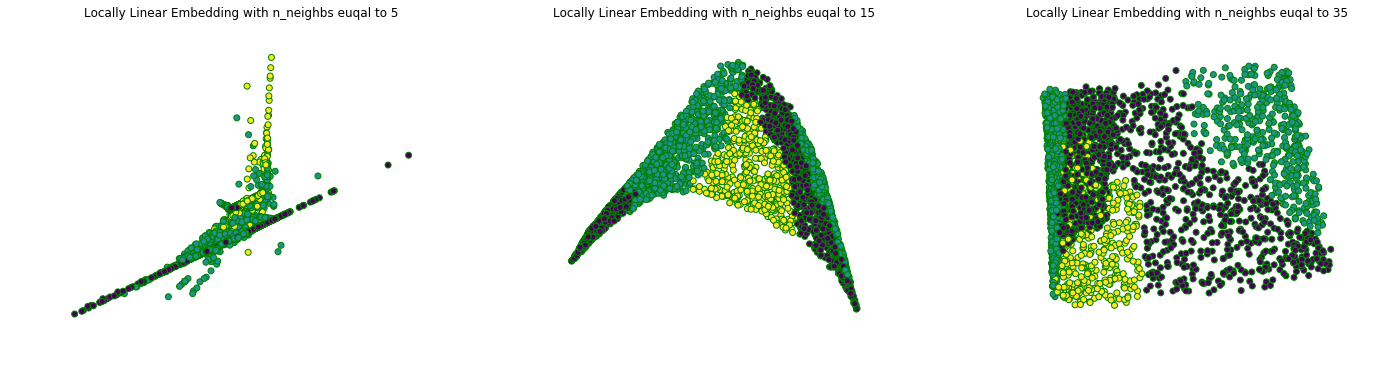

In [76]:
n_neighbs = [5, 15, 35] 
ax_s = [ax1, ax2, ax3]
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    man_mods._lle(2, n_neighbs[idx])
    title = str("Locally Linear Embedding with n_neighbs euqal to ") + str(n_neighbs[idx])          
    ax.set_title(title)
    ax.scatter(man_mods.X2D_lle[:,0], man_mods.X2D_lle[:,1], c=man_mods.y, edgecolor = 'g')
    ax.axis('off')
plt.show()

When the number of neighbors is greater than the number of input dimension, which happens in the below for example, there is a problem with rank of the local neighbors matrix. Some coefficients might be equal to zero and hence misleading - lead to multiple solutions. To avoid that issue, we use the standard tool for controlling weights - the regularization. First option is the **Modifies Locally Linear Embedding** - it's obtained by setting the paramter *method='modified'*. It creates multiple linearly independent local weight vectors for each neighborhood, then uses these weight vectors to find improved and more stable embedding:

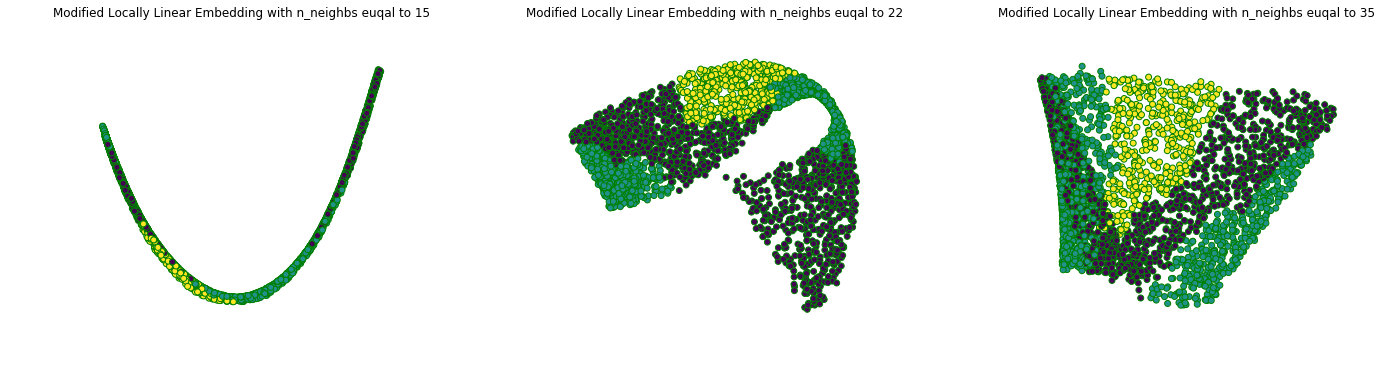

In [103]:
n_neighbs = [15, 22, 35] 
ax_s = [ax1, ax2, ax3]
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    man_mods._lle(2, n_neighbs[idx], method='modified')
    title = str("Modified Locally Linear Embedding with n_neighbs euqal to ") + str(n_neighbs[idx])          
    ax.set_title(title)
    ax.scatter(man_mods.X2D_lle[:,0], man_mods.X2D_lle[:,1], c=man_mods.y, edgecolor = 'g')
    ax.axis('off')
plt.show()

Next possibility of regularization is the **Hessian Eigenmapping** (Hessian-based LLE, HLLE). Roughly speaking it's based on local isometry property - it assumes that our manifold can be treat as the (Riemannian) submanifold of some Euclidean space and is locally isometric to an open, connected subset of Euclidean subspace:$$\mathbb{R}^n\supset\ M\cong_{\text{loc.}} N\subset\mathbb{R}^k.$$
The fact that $N$ has not to be convex, allows to consider more complicated cases, unlikely Isomap does. The quadratic from $$\mathcal{H}(f) = \int_M\|H_f(m)\|^2_F dm$$ averages the Frobenius norm of the Hessian over $M$ for $f:M\longrightarrow\mathbb{R}$. From the local isometry fact, there is $d$-dimensional space of functions spanned by original isometric coordinates, and it's contained in $\mathcal{H}(f)$. Therefore such coordinates can be reconstructed to a linear isometry:

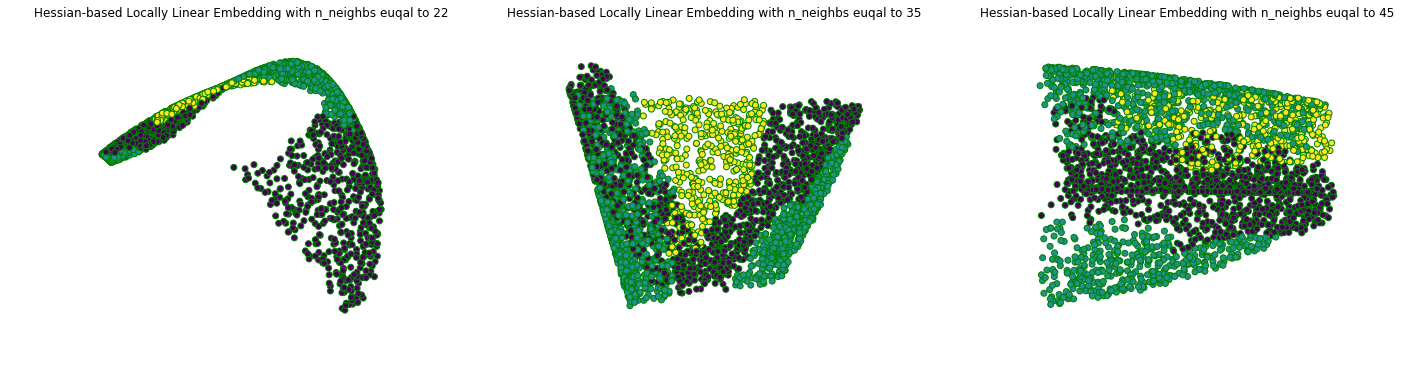

In [107]:
n_neighbs = [22, 35, 45] 
ax_s = [ax1, ax2, ax3]
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    man_mods._lle(2, n_neighbs[idx], method='hessian')
    title = str("Hessian-based Locally Linear Embedding with n_neighbs euqal to ") + str(n_neighbs[idx])          
    ax.set_title(title)
    ax.scatter(man_mods.X2D_lle[:,0], man_mods.X2D_lle[:,1], c=man_mods.y, edgecolor = 'g')
    ax.axis('off')
plt.show()

Another modification of the above algorithm changes the way of looking for the local neighborhood, it is called **Local Tangent Space Alignment**. Instead of using strictly topological properties, it finds the linear mapping from the original high-dimensional space, to its local tangent space. This process seems to be associated with a differential geometry area, rather than with the topology, however, in differential topology both concepts are related to each other. One can obtain this technique, by setting the *method='lsta'* as shown below:

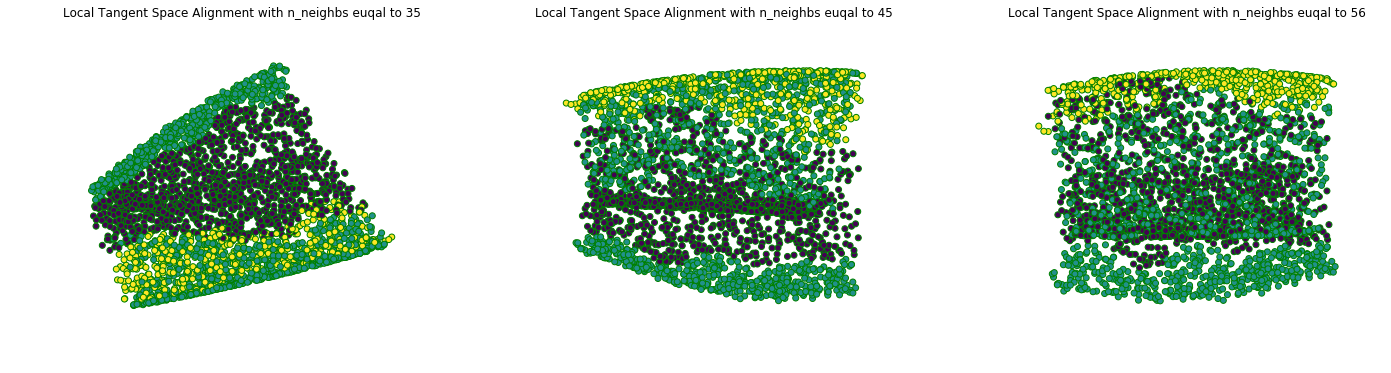

In [27]:
n_neighbs = [35, 45, 56] 
ax_s = [ax1, ax2, ax3]
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    man_mods._lle(2, n_neighbs[idx], method='ltsa')
    title = str("Local Tangent Space Alignment with n_neighbs euqal to ") + str(n_neighbs[idx])          
    ax.set_title(title)
    ax.scatter(man_mods.X2D_lle[:,0], man_mods.X2D_lle[:,1], c=man_mods.y, edgecolor = 'g')
    ax.axis('off')
plt.show()

The next approach is called the **t-distributed Stochastic Neighbor Embedding (t-SNE)** and is quite different than previous ones. It uses probability theory to measure similarities (distance) of points in the high- and low-dimensional data spaces, then it tries to optimize both measures. In the first step the model counts distances between points in the original space. We can set the range for which some points will be treated as 'close enough' - the parameter is called *perplexity* and works similarly like *n_neighbors* in previous models. The distance is calculated using the normal distribution - each point is taken as the mean of the distribution, then the distance is assigned to the probability density value. In the second step the low-dimensional space is created. The fact that it's randomly chosen, makes such technique unstable, unrepeatable, and less precise than for example PCA. On the other hand it's able to find non-linear characteristics in the data, unlikely is PCA. Then, distances in the low-dimensional space are calculated similarly like previously, but now with the t-Student distribution. In the final step the model optimizes probabilities (distances) from both spaces. It's made using the **Kullback-Leibler divergence formula** - given two discrete probability distributions $p, q$, we can compute the divergence between them by:
$$\text{DIV}_{KL}(p, q) = \sum_{i}p(i)\log\left(\frac{p(i)}{q(i)}\right).$$
Kullback-Leibler divergence formula is asymmetric, so it can precisely check similarities between probabilities in both spaces. Finally the model uses a gradient descent to minimize the cost function. In the below two hyperparameters are tuning: 

*perplexity* - that is the number of nearest neighbors

*early_exaggeration* - that tunes the spaces between natural clusters - greater the value, more thightly are natural clusters in the embedded space

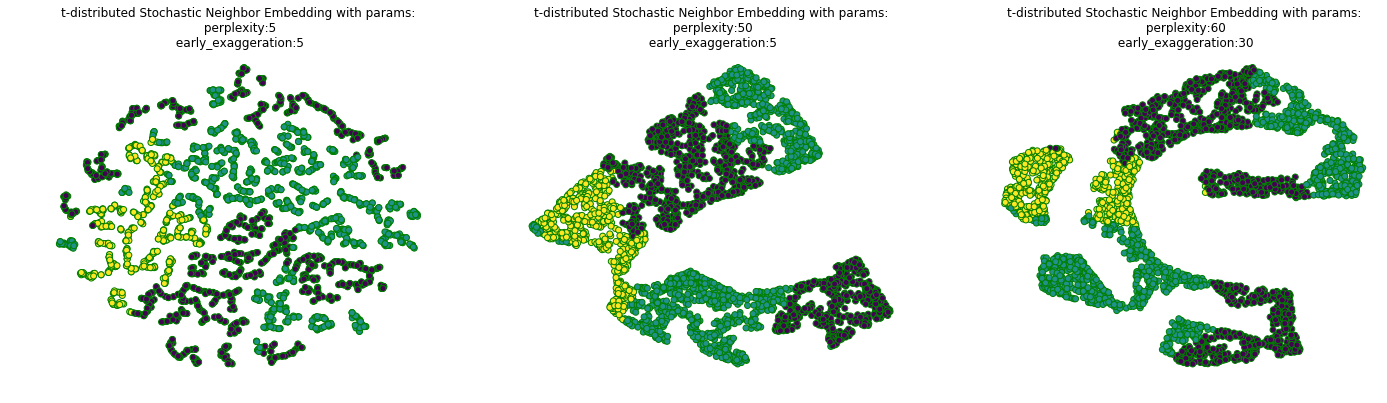

In [76]:
params = {0: [5, 5], 1: [50, 5], 2: [60, 30]} 
ax_s = [ax1, ax2, ax3]
f, ax_s = plt.subplots(1, 3, figsize=(24, 6))
for idx, ax in enumerate(ax_s):
    man_mods._tsne(params[idx][0], params[idx][1])
    title = str("t-distributed Stochastic Neighbor Embedding with params:\n perplexity:") + str(params[idx][0]) + str("\n early_exaggeration:") + str(params[idx][1])          
    ax.set_title(title)
    ax.scatter(man_mods.X2D_tsne[:,0], man_mods.X2D_tsne[:,1], c=man_mods.y, edgecolor = 'g')
    ax.axis('off')
plt.show()

There is much more hyperparamater that can be tuned, all of them can be found below. Finally it's good to know, that tSNE is commonly used for the visualisation task, rather than for clustering, because of its random nature.

In [77]:
man_mods.tsne_params

<bound method BaseEstimator.get_params of TSNE(angle=0.5, early_exaggeration=30, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=60, random_state=None, verbose=0)>

### 4. Conclusions.

In general there are many other popular techniques using for the dimensionality reduction. Among many modifications and regularizations that can be implemented for the presented models, manifold library has also Multi Dimensional Scaling and Spectral Embedding models. Dimensionality reduction is a very large topic that may concern many different areas of mathematics and machine-learning like: linear algebra, probability theory, statiscits, topology and differential topology or deep learning methods. All of them have pros and cons, some are better for visualisation, some are more accurate from the mathematical point of view, another can handle high-dimensional non-linear data structures. The choice of the right tool is strictly related to the 'shape' of the data we have. Another factors to consider can be the computational complexity, stability, easy interpretaion and so on. Usually, models that are characterized as manifold learning methods, require deeper knowledge in area they concern, especially from high-dimensional linear algebra, topology, algebra and differential geometry. So that, to get better intuition and understanding, it's good to read some serious-science articles, where all constructions, definitions and algorithms are mathematically based and proved rigorously.

Hope you enjoyed reading my overview.